In [ ]:
# Installing Requirements
!pip install -r requirements.txt

In [2]:
# Unzipping Database
!tar -xvzf /kaggle/input/lfwpeople/lfw-funneled.tgz

tar (child): /kaggle/input/lfwpeople/lfw-funneled.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
import PIL.ImageOps

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.utils
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch import optim
import torch.nn.functional as F


In [ ]:
def imshow(img, text=None):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic', fontweight='bold',
                 bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_plot(iteration, loss):
    plt.plot(iteration, loss)
    plt.show()


In [ ]:
class SiameseNetworkDataset(Dataset):
    def __init__(self, imageFolderDataset, transform=None):
        self.imageFolderDataset = imageFolderDataset
        self.transform = transform

    def __getitem__(self, index):
        img0_tuple = random.choice(self.imageFolderDataset.imgs)

        should_get_same_class = random.randint(0, 1)
        if should_get_same_class:
            while True:
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] == img1_tuple[1]:
                    break
        else:
            while True:
                img1_tuple = random.choice(self.imageFolderDataset.imgs)
                if img0_tuple[1] != img1_tuple[1]:
                    break

        img0 = Image.open(img0_tuple[0])
        img1 = Image.open(img1_tuple[0])

        img0 = img0.convert("L")
        img1 = img1.convert("L")

        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)

        return img0, img1, torch.from_numpy(np.array([int(img1_tuple[1] != img0_tuple[1])], dtype=np.float32))

    def __len__(self):
        return len(self.imageFolderDataset.imgs)


In [ ]:
# Unzipping the local Data
!unzip /content/Data.zip

In [ ]:
!rm -r ./data2/

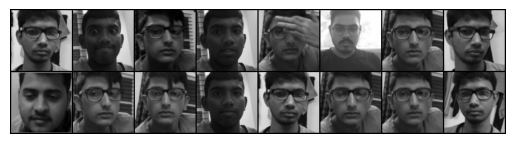

[1. 1. 0. 0. 1. 1. 0. 0.]


In [ ]:
folder_dataset = datasets.ImageFolder(root="/content/Data/Faces/training")

transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()
                                    ])

siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset,
                                        transform=transformation)

vis_dataloader = DataLoader(siamese_dataset,
                            shuffle=True,
                            num_workers=2,
                            batch_size=8)

example_batch = next(iter(vis_dataloader))
concatenated = torch.cat((example_batch[0], example_batch[1]), 0)

imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy().reshape(-1))

# 0 = Same Person
# 1 = Different Person

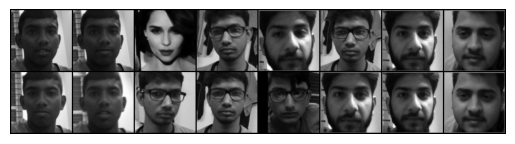

[0. 0. 1. 0. 1. 1. 0. 0.]
Epoch number 0
 Current loss 2.2434794902801514

Epoch number 1
 Current loss 0.9373769760131836

Epoch number 2
 Current loss 1.9582933187484741

Epoch number 3
 Current loss 0.6235905289649963

Epoch number 4
 Current loss 0.2177698314189911

Epoch number 5
 Current loss 0.2531346380710602

Epoch number 6
 Current loss 0.1786612719297409

Epoch number 7
 Current loss 0.11047859489917755

Epoch number 8
 Current loss 0.12396347522735596

Epoch number 9
 Current loss 0.11219277232885361

Epoch number 10
 Current loss 0.058276157826185226

Epoch number 11
 Current loss 0.04729527607560158

Epoch number 12
 Current loss 0.07664123177528381

Epoch number 13
 Current loss 0.048860497772693634

Epoch number 14
 Current loss 0.03421078249812126

Epoch number 15
 Current loss 0.0400027260184288

Epoch number 16
 Current loss 0.024556202813982964

Epoch number 17
 Current loss 0.01908912882208824

Epoch number 18
 Current loss 0.019139377400279045

Epoch number 19
 Cu

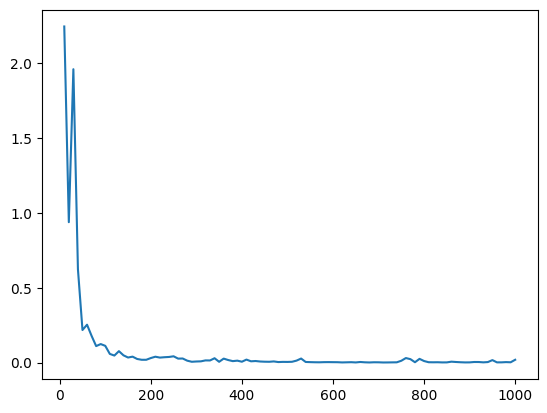

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image, UnidentifiedImageError
import PIL.ImageOps

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.utils
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

# Creating some helper functions
def imshow(img, text=None):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic', fontweight='bold',
                 bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})

    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_plot(iteration, loss):
    plt.plot(iteration, loss)
    plt.show()

class SiameseNetworkDataset(Dataset):
    def __init__(self, imageFolderDataset, transform=None):
        self.imageFolderDataset = imageFolderDataset
        self.transform = transform

    def __getitem__(self, index):
        while True:
            try:
                img0_tuple = random.choice(self.imageFolderDataset.imgs)

                should_get_same_class = random.randint(0, 1)
                if should_get_same_class:
                    while True:
                        img1_tuple = random.choice(self.imageFolderDataset.imgs)
                        if img0_tuple[1] == img1_tuple[1]:
                            break
                else:
                    while True:
                        img1_tuple = random.choice(self.imageFolderDataset.imgs)
                        if img0_tuple[1] != img1_tuple[1]:
                            break

                img0 = Image.open(img0_tuple[0])
                img1 = Image.open(img1_tuple[0])

                img0 = img0.convert("L")
                img1 = img1.convert("L")

                if self.transform is not None:
                    img0 = self.transform(img0)
                    img1 = self.transform(img1)

                return img0, img1, torch.from_numpy(np.array([int(img1_tuple[1] != img0_tuple[1])], dtype=np.float32))
            except (OSError, UnidentifiedImageError):
                # Skip this pair and try another one
                continue

    def __len__(self):
        return len(self.imageFolderDataset.imgs)

folder_dataset = datasets.ImageFolder(root="/content/Data/Faces/training")
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset,
                                        transform=transformation)

vis_dataloader = DataLoader(siamese_dataset,
                            shuffle=True,
                            num_workers=2,
                            batch_size=8)

example_batch = next(iter(vis_dataloader))
concatenated = torch.cat((example_batch[0], example_batch[1]), 0)
imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy().reshape(-1))

class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()

        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11, stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),

            nn.Conv2d(256, 384, kernel_size=3, stride=1),
            nn.ReLU(inplace=True)
        )

        self._to_linear = None
        self.convs(torch.randn(1, 1, 100, 100))

        self.fc1 = nn.Sequential(
            nn.Linear(self._to_linear, 1024),
            nn.ReLU(inplace=True),

            nn.Linear(1024, 256),
            nn.ReLU(inplace=True),

            nn.Linear(256, 2)
        )

    def convs(self, x):
        x = self.cnn1(x)
        if self._to_linear is None:
            self._to_linear = x.view(x.size(0), -1).shape[1]
        return x

    def forward_once(self, x):
        output = self.convs(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim=True)
        loss_contrastive = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss_contrastive

train_dataloader = DataLoader(siamese_dataset,
                              shuffle=True,
                              num_workers=2,
                              batch_size=64)

net = SiameseNetwork().cuda()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)

counter = []
loss_history = []
iteration_number = 0

for epoch in range(100):
    for i, (img0, img1, label) in enumerate(train_dataloader, 0):
        img0, img1, label = img0.cuda(), img1.cuda(), label.cuda()

        optimizer.zero_grad()
        output1, output2 = net(img0, img1)
        loss_contrastive = criterion(output1, output2, label)
        loss_contrastive.backward()
        optimizer.step()

        if i % 10 == 0:
            print(f"Epoch number {epoch}\n Current loss {loss_contrastive.item()}\n")
            iteration_number += 10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())

# Save the trained model
torch.save(net.state_dict(), 'siamese_model.pth')

show_plot(counter, loss_history)


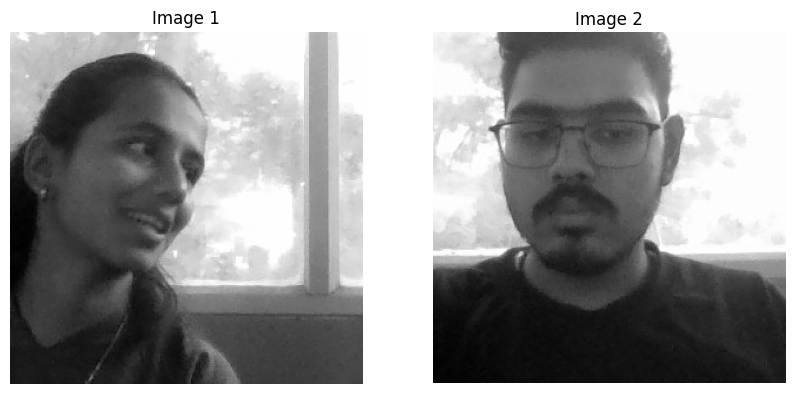

Dissimilarity: 1.27
Person in Photos are Different


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Function to display images side by side
def show_images_side_by_side(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Image 1')

    axs[1].imshow(img2, cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Image 2')

    plt.show()

# Function to compare two images
def compare_images(img_path1, img_path2):
    img1 = Image.open(img_path1).convert("L")
    img2 = Image.open(img_path2).convert("L")
    img1_tensor = transformation(img1).unsqueeze(0).cuda()
    img2_tensor = transformation(img2).unsqueeze(0).cuda()

    output1, output2 = net(img1_tensor, img2_tensor)
    euclidean_distance = F.pairwise_distance(output1, output2).item()

    show_images_side_by_side(img1, img2)
    print(f'Dissimilarity: {euclidean_distance:.2f}')

    if euclidean_distance <= 1:
        print("Person in Both Photos is the same")
    else:
        print("Person in Photos are Different")

# Example usage to compare two images
compare_images("/content/Data/Faces/testing/Mouna/Mouna0.jpg", "/content/Data/Faces/training/Tarun/Tarun3.jpg")


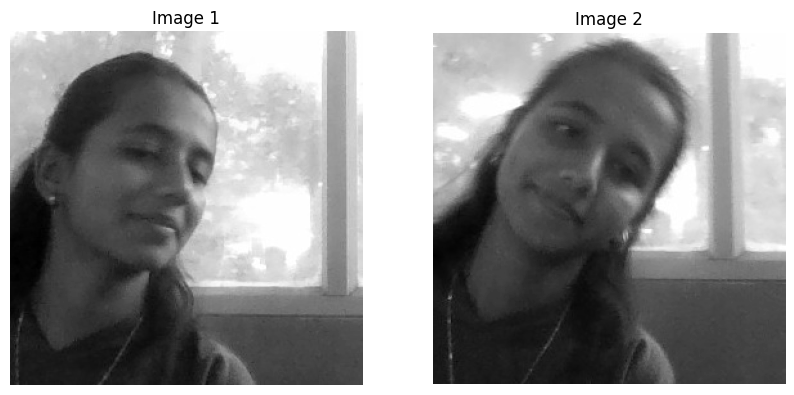

Dissimilarity: 0.01
Person in Photos are Different


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Create a dictionary to map image paths to person names
def create_image_to_name_mapping(root_dir):
    image_to_name = {}
    for person_name in os.listdir(root_dir):
        person_dir = os.path.join(root_dir, person_name)
        if os.path.isdir(person_dir):
            for img_name in os.listdir(person_dir):
                img_path = os.path.join(person_dir, img_name)
                image_to_name[img_path] = person_name
    return image_to_name

# Assume the root directory is "./Data/Faces/testing/"
image_to_name_mapping = create_image_to_name_mapping("./Data/Faces/testing/")

# Function to display images side by side
def show_images_side_by_side(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Image 1')

    axs[1].imshow(img2, cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Image 2')

    plt.show()

# Function to compare two images
def compare_images(img_path1, img_path2):
    img1 = Image.open(img_path1).convert("L")
    img2 = Image.open(img_path2).convert("L")
    img1_tensor = transformation(img1).unsqueeze(0).cuda()
    img2_tensor = transformation(img2).unsqueeze(0).cuda()

    output1, output2 = net(img1_tensor, img2_tensor)
    euclidean_distance = F.pairwise_distance(output1, output2).item()

    show_images_side_by_side(img1, img2)
    print(f'Dissimilarity: {euclidean_distance:.2f}')

    if euclidean_distance <= 1:
        name1 = image_to_name_mapping.get(img_path1, None)
        name2 = image_to_name_mapping.get(img_path2, None)

        if name1 and name2 and name1 == name2:
            print(f"Person in Both Photos: {name1}")
        else:
            print("Person in Photos are Different")
    else:
        print("Person in Photos are Different")

# Example usage to compare two images
compare_images("/content/Data/Faces/testing/Mouna/Mouna1.jpg", "/content/Data/Faces/testing/Mouna/Mouna3.jpg")


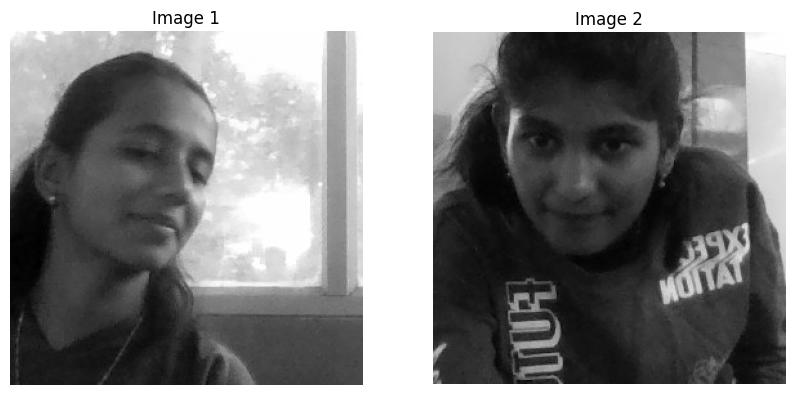

Dissimilarity: 2.12
Person in Photos are Different


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Create a dictionary to map image paths to person names
def create_image_to_name_mapping(root_dir):
    image_to_name = {}
    for person_name in os.listdir(root_dir):
        person_dir = os.path.join(root_dir, person_name)
        if os.path.isdir(person_dir):
            for img_name in os.listdir(person_dir):
                img_path = os.path.join(person_dir, img_name)
                image_to_name[img_path] = person_name
    return image_to_name

# Assume the root directory is "./Data/Faces/testing/"
image_to_name_mapping = create_image_to_name_mapping("./Data/Faces/testing/")

# Function to display images side by side
def show_images_side_by_side(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Image 1')

    axs[1].imshow(img2, cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Image 2')

    plt.show()

# Function to compare two images
def compare_images(img_path1, img_path2, threshold=1.0):
    img1 = Image.open(img_path1).convert("L")
    img2 = Image.open(img_path2).convert("L")
    img1_tensor = transformation(img1).unsqueeze(0).cuda()
    img2_tensor = transformation(img2).unsqueeze(0).cuda()

    output1, output2 = net(img1_tensor, img2_tensor)
    euclidean_distance = F.pairwise_distance(output1, output2).item()

    show_images_side_by_side(img1, img2)
    print(f'Dissimilarity: {euclidean_distance:.2f}')

    if euclidean_distance <= threshold:
        name1 = image_to_name_mapping.get(img_path1, "Unknown")
        name2 = image_to_name_mapping.get(img_path2, "Unknown")

        if name1 and name2 and name1 == name2:
            print(f"Person in Both Photos: {name1}")
        else:
            print("Person in Photos are Different")
    else:
        print("Person in Photos are Different")

# Example usage to compare two images with a threshold of 0.5
compare_images("/content/Data/Faces/testing/Mouna/Mouna1.jpg", "/content/Data/Faces/training/Bindu/Bindu2.jpg")


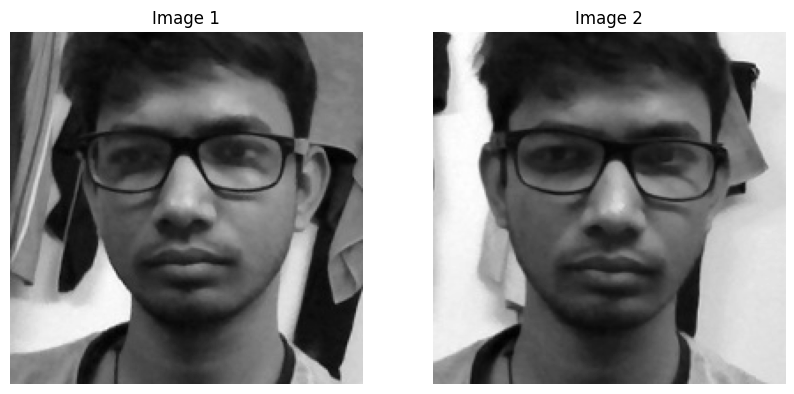

Dissimilarity: 0.05
Person in Both Photos: Mohit


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Function to display images side by side
def show_images_side_by_side(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Image 1')

    axs[1].imshow(img2, cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Image 2')

    plt.show()

# Function to find the directory in the dataset
def find_matching_directory(img_path1, img_path2, root_dir, threshold=1.0):
    img1 = Image.open(img_path1).convert("L")
    img2 = Image.open(img_path2).convert("L")
    img1_tensor = transformation(img1).unsqueeze(0).cuda()
    img2_tensor = transformation(img2).unsqueeze(0).cuda()

    output1, output2 = net(img1_tensor, img2_tensor)
    euclidean_distance = F.pairwise_distance(output1, output2).item()

    show_images_side_by_side(img1, img2)
    print(f'Dissimilarity: {euclidean_distance:.2f}')

    if euclidean_distance <= threshold:
        # Scan the dataset to find matching directory
        for person_name in os.listdir(root_dir):
            person_dir = os.path.join(root_dir, person_name)
            if os.path.isdir(person_dir):
                for img_name in os.listdir(person_dir):
                    img_path = os.path.join(person_dir, img_name)
                    img_tensor = transformation(Image.open(img_path).convert("L")).unsqueeze(0).cuda()
                    output = net.forward_once(img_tensor)
                    dist = F.pairwise_distance(output, output1).item()

                    if dist <= threshold:
                        print(f"Person in Both Photos: {person_name}")
                        return

        print("Person is same in picture, but not stored in our system")
    else:
        print("Person in Photos are Different")

# Example usage
find_matching_directory("/content/Data/Faces/training/Mohit/Mohit10.jpg", "/content/Data/Faces/training/Mohit/Mohit15.jpg", "./Data/Faces/training/", threshold=1.0)


Person in the image is: Mouna


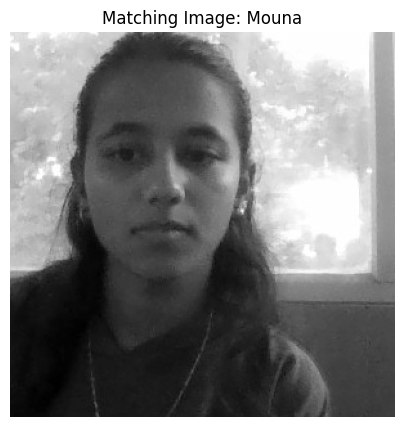

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Function to display an image
def show_image(img, title=None):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

# Function to find the person in the dataset
def find_person_in_dataset(img_path, root_dir, threshold=1.0):
    img = Image.open(img_path).convert("L")
    img_tensor = transformation(img).unsqueeze(0).cuda()

    output_img = net.forward_once(img_tensor)

    # Iterate over the dataset to find a match
    for person_name in os.listdir(root_dir):
        person_dir = os.path.join(root_dir, person_name)
        if os.path.isdir(person_dir):
            for img_name in os.listdir(person_dir):
                img_path_in_dataset = os.path.join(person_dir, img_name)
                img_dataset = Image.open(img_path_in_dataset).convert("L")
                img_dataset_tensor = transformation(img_dataset).unsqueeze(0).cuda()
                output_dataset_img = net.forward_once(img_dataset_tensor)

                # Calculate distance
                dist = F.pairwise_distance(output_img, output_dataset_img).item()

                if dist <= threshold:
                    print(f"Person in the image is: {person_name}")
                    show_image(img_dataset, title=f"Matching Image: {person_name}")
                    return

    # Not found case
    print("Person isn't available in our system")
    show_image(img, title="Matching Image: Not Found")

# Example usage
find_person_in_dataset("/content/virat.jpg", "./Data/Faces/testing/", threshold=1.0)


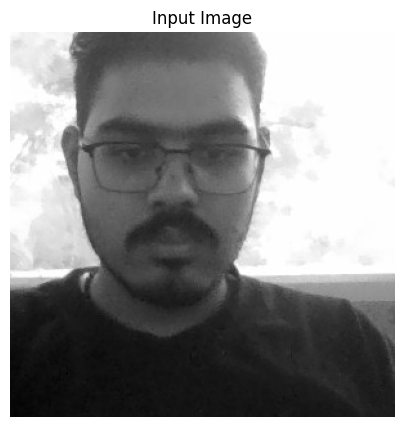

Person in the image is: Tarun


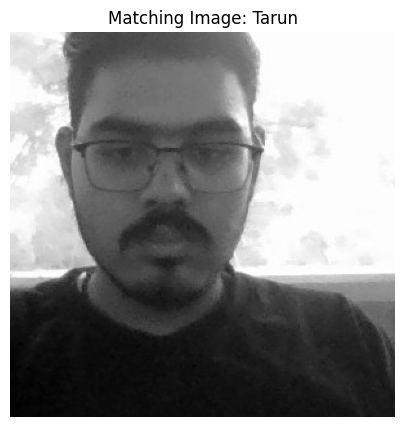

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch import nn

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()

        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11, stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),

            nn.Conv2d(256, 384, kernel_size=3, stride=1),
            nn.ReLU(inplace=True)
        )

        self._to_linear = None
        self.convs(torch.randn(1, 1, 100, 100))

        self.fc1 = nn.Sequential(
            nn.Linear(self._to_linear, 1024),
            nn.ReLU(inplace=True),

            nn.Linear(1024, 256),
            nn.ReLU(inplace=True),

            nn.Linear(256, 2)
        )

    def convs(self, x):
        x = self.cnn1(x)
        if self._to_linear is None:
            self._to_linear = x.view(x.size(0), -1).shape[1]
        return x

    def forward_once(self, x):
        output = self.convs(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Function to display an image
def show_image(img, title=None):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

# Function to recursively find all subdirectories that contain image files
def find_all_image_directories(root_dir):
    image_directories = []
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if any(fname.lower().endswith(('.png', '.jpg', '.jpeg')) for fname in filenames):
            image_directories.append(dirpath)
    return image_directories

# Function to find the person in the dataset
def find_person_in_dataset(img_path, root_dir, threshold=0.5):
    img = Image.open(img_path).convert("L")
    img_tensor = transformation(img).unsqueeze(0).cuda()

    output_img = net.forward_once(img_tensor)
    match_found = False
    matched_username = None
    matched_img = None

    # Get all subdirectories containing images
    image_directories = find_all_image_directories(root_dir)

    # Iterate over the image directories to find a match
    for image_directory in image_directories:
        # Extract the username from the directory name
        username = os.path.basename(image_directory).replace('_',' ')
        for img_name in os.listdir(image_directory):
            img_path_in_dataset = os.path.join(image_directory, img_name)
            if not img_path_in_dataset.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue
            try:
                img_dataset = Image.open(img_path_in_dataset).convert("L")
                img_dataset_tensor = transformation(img_dataset).unsqueeze(0).cuda()
                output_dataset_img = net.forward_once(img_dataset_tensor)

                # Calculate distance
                dist = F.pairwise_distance(output_img, output_dataset_img).item()
                #print(f"Checking directory: {image_directory}, Image: {img_name}, Diff: {dist}")

                if dist <= threshold:
                    match_found = True
                    matched_username = username
                    matched_img = img_dataset
                    break
            except (OSError, UnidentifiedImageError):
                print(f"Skipping corrupted image: {img_path_in_dataset}")
                continue
        if match_found:
            break

    show_image(img, title="Input Image")
    if match_found:
        print(f"Person in the image is: {matched_username}")
        show_image(matched_img, title=f"Matching Image: {matched_username}")
    else:
        print("Person isn't available in our system")

# Example usage
input_image_path = "/content/Data/Faces/testing/Tarun/Tarun7.jpg"  # Replace with the path to your image
find_person_in_dataset(input_image_path, "/content/Data/Faces", threshold=0.2)


In [ ]:
!pip install pyngrok


In [ ]:
import os
from flask import Flask, request, render_template_string, redirect
from werkzeug.utils import secure_filename
import torch
import torchvision.transforms as transforms
from PIL import Image, UnidentifiedImageError
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from pyngrok import ngrok

# Define the transformation
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                     transforms.ToTensor()])

# Load the pretrained model
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()

        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11, stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),

            nn.Conv2d(256, 384, kernel_size=3, stride=1),
            nn.ReLU(inplace=True)
        )

        self._to_linear = None
        self.convs(torch.randn(1, 1, 100, 100))

        self.fc1 = nn.Sequential(
            nn.Linear(self._to_linear, 1024),
            nn.ReLU(inplace=True),

            nn.Linear(1024, 256),
            nn.ReLU(inplace=True),

            nn.Linear(256, 2)
        )

    def convs(self, x):
        x = self.cnn1(x)
        if self._to_linear is None:
            self._to_linear = x.view(x.size(0), -1).shape[1]
        return x

    def forward_once(self, x):
        output = self.convs(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

net = SiameseNetwork().cuda()
net.load_state_dict(torch.load('siamese_model.pth'))
net.eval()

# Flask setup
app = Flask(__name__)
app.config['UPLOAD_FOLDER'] = 'uploads'
app.config['ALLOWED_EXTENSIONS'] = {'png', 'jpg', 'jpeg'}

# Ensure the uploads directory exists
if not os.path.exists(app.config['UPLOAD_FOLDER']):
    os.makedirs(app.config['UPLOAD_FOLDER'])

def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1].lower() in app.config['ALLOWED_EXTENSIONS']

def show_image(img):
    buf = BytesIO()
    img.save(buf, format='PNG')
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    return img_str

def find_all_image_directories(root_dir):
    image_directories = []
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if any(fname.lower().endswith(('.png', '.jpg', '.jpeg')) for fname in filenames):
            image_directories.append(dirpath)
    return image_directories

def find_person_in_dataset(img_path, root_dir, threshold=0.5):
    img = Image.open(img_path).convert("L")
    img_tensor = transformation(img).unsqueeze(0).cuda()

    output_img = net.forward_once(img_tensor)
    match_found = False
    matched_username = None
    matched_img = None

    image_directories = find_all_image_directories(root_dir)

    for image_directory in image_directories:
        username = os.path.basename(image_directory).replace('_',' ')
        for img_name in os.listdir(image_directory):
            img_path_in_dataset = os.path.join(image_directory, img_name)
            if not img_path_in_dataset.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue
            try:
                img_dataset = Image.open(img_path_in_dataset).convert("L")
                img_dataset_tensor = transformation(img_dataset).unsqueeze(0).cuda()
                output_dataset_img = net.forward_once(img_dataset_tensor)

                dist = F.pairwise_distance(output_img, output_dataset_img).item()

                if dist <= threshold:
                    match_found = True
                    matched_username = username
                    matched_img = img_dataset
                    break
            except (OSError, UnidentifiedImageError):
                continue
        if match_found:
            break

    input_img_str = show_image(img)
    if match_found:
        matched_img_str = show_image(matched_img)
        return matched_username, input_img_str, matched_img_str
    else:
        return None, input_img_str, None

@app.route('/', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        if 'file' not in request.files:
            return redirect(request.url)
        file = request.files['file']
        if file.filename == '':
            return redirect(request.url)
        if file and allowed_file(file.filename):
            filename = secure_filename(file.filename)
            filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
            file.save(filepath)
            matched_username, input_img_str, matched_img_str = find_person_in_dataset(filepath, "/content/Data/Faces", threshold=0.2)
            if matched_username:
                return render_template_string(TEMPLATE_MATCH_FOUND, username=matched_username, input_img_str=input_img_str, matched_img_str=matched_img_str)
            else:
                return render_template_string(TEMPLATE_MATCH_NOT_FOUND, input_img_str=input_img_str)
    return render_template_string(TEMPLATE_UPLOAD)

TEMPLATE_UPLOAD = '''
<!doctype html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Siamese Network Based People Recognition</title>
    <style>
        body {
            background: linear-gradient(45deg, #1d1d1d, #282828, #1d1d1d);
            color: #f0f0f0;
            font-family: 'Arial', sans-serif;
            display: flex;
            flex-direction: column;
            align-items: center;
            justify-content: center;
            height: 100vh;
            margin: 0;
        }
        h1 {
            margin: 20px 0;
            font-size: 3em;
            text-align: center;
        }
        .upload-container {
            background: rgba(255, 255, 255, 0.1);
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 4px 10px rgba(0, 0, 0, 0.3);
            text-align: center;
            width: 80%;
            max-width: 500px;
        }
        .upload-btn {
            background: #00bfff;
            border: none;
            padding: 10px 20px;
            border-radius: 5px;
            color: white;
            font-size: 1em;
            cursor: pointer;
            margin-top: 20px;
        }
        .upload-btn:hover {
            background: #009acd;
        }
        .try-again-btn {
            background: #ff4c4c;
            border: none;
            padding: 10px 20px;
            border-radius: 5px;
            color: white;
            font-size: 1em;
            cursor: pointer;
            margin-top: 20px;
        }
        .try-again-btn:hover {
            background: #cc0000;
        }
        @media (max-width: 768px) {
            h1 {
                font-size: 2em;
            }
            .upload-container {
                width: 90%;
            }
        }
    </style>
</head>
<body>
    <h1>Siamese Network Based People Recognition</h1>
    <div class="upload-container">
        <form method="post" enctype="multipart/form-data">
            <input type="file" name="file" accept="image/*">
            <button class="upload-btn" type="submit">Upload</button>
        </form>
    </div>
</body>
</html>
'''

TEMPLATE_MATCH_FOUND = '''
<!doctype html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Match Found</title>
    <style>
        body {
            background: linear-gradient(45deg, #1d1d1d, #282828, #1d1d1d);
            color: #f0f0f0;
            font-family: 'Arial', sans-serif;
            display: flex;
            flex-direction: column;
            align-items: center;
            justify-content: center;
            height: 100vh;
            margin: 0;
        }
        h1 {
            margin: 20px 0;
            font-size: 3em;
            text-align: center;
        }
        .result-container {
            background: rgba(255, 255, 255, 0.1);
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 4px 10px rgba(0, 0, 0, 0.3);
            text-align: center;
            width: 80%;
            max-width: 500px;
        }
        .result-container img {
            max-width: 100%;
            height: auto;
            border-radius: 10px;
            margin-top: 20px;
        }
        .try-again-btn {
            background: #ff4c4c;
            border: none;
            padding: 10px 20px;
            border-radius: 5px;
            color: white;
            font-size: 1em;
            cursor: pointer;
            margin-top: 20px;
        }
        .try-again-btn:hover {
            background: #cc0000;
        }
        @media (max-width: 768px) {
            h1 {
                font-size: 2em;
            }
            .result-container {
                width: 90%;
            }
        }
    </style>
</head>
<body>
    <h1>Match Found</h1>
    <div class="result-container">
        <p>Person in the image is: {{ username }}</p>
        <img src="data:image/png;base64,{{ input_img_str }}">
        <h2>Matching Image</h2>
        <img src="data:image/png;base64,{{ matched_img_str }}">
        <form method="get" action="/">
            <button class="try-again-btn" type="submit">Try Again</button>
        </form>
    </div>
</body>
</html>
'''

TEMPLATE_MATCH_NOT_FOUND = '''
<!doctype html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Match Not Found</title>
    <style>
        body {
            background: linear-gradient(45deg, #1d1d1d, #282828, #1d1d1d);
            color: #f0f0f0;
            font-family: 'Arial', sans-serif;
            display: flex;
            flex-direction: column;
            align-items: center;
            justify-content: center;
            height: 100vh;
            margin: 0;
        }
        h1 {
            margin: 20px 0;
            font-size: 3em;
            text-align: center;
        }
        .result-container {
            background: rgba(255, 255, 255, 0.1);
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 4px 10px rgba(0, 0, 0, 0.3);
            text-align: center;
            width: 80%;
            max-width: 500px;
        }
        .result-container img {
            max-width: 100%;
            height: auto;
            border-radius: 10px;
            margin-top: 20px;
        }
        .try-again-btn {
            background: #ff4c4c;
            border: none;
            padding: 10px 20px;
            border-radius: 5px;
            color: white;
            font-size: 1em;
            cursor: pointer;
            margin-top: 20px;
        }
        .try-again-btn:hover {
            background: #cc0000;
        }
        @media (max-width: 768px) {
            h1 {
                font-size: 2em;
            }
            .result-container {
                width: 90%;
            }
        }
    </style>
</head>
<body>
    <h1>Match Not Found</h1>
    <div class="result-container">
        <img src="data:image/png;base64,{{ input_img_str }}">
        <form method="get" action="/">
            <button class="try-again-btn" type="submit">Try Again</button>
        </form>
    </div>
</body>
</html>
'''

# Run the Flask app
port = 5000
public_url = ngrok.connect(port)
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"")
app.run(host='0.0.0.0', port=port)


 * ngrok tunnel "NgrokTunnel: "https://7bdf-34-87-33-218.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [31/Jul/2024 13:59:56] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [31/Jul/2024 13:59:57] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [31/Jul/2024 14:00:02] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [31/Jul/2024 14:00:17] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [31/Jul/2024 14:00:18] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [31/Jul/2024 14:00:19] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [31/Jul/2024 14:00:26] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [31/Jul/2024 14:00:33] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [31/Jul/2024 14:01:28] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [3